In [125]:
import numpy
from matplotlib import pylab
import math
from scipy import linalg

In [126]:
%matplotlib inline

In [127]:
def support_func(x):
    x = float(x)
    return math.sin(x / 5) * math.exp(x/10) + 5 * math.exp(-x / 2)

f = numpy.vectorize(support_func)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 5.          3.25221687  2.31503384  1.87783842  1.74684595  1.7977761
  1.94722128  2.13543898  2.31617016  2.45082365  2.50541641  2.44929128
  2.2550105   1.89904466  1.36300335  0.63522142]


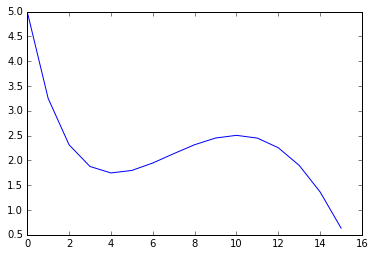

In [128]:
x_axis = numpy.arange(0,16) # last value (16) will not be included
y_axis = f(x_axis)

print x_axis
print y_axis

pylab.plot(x_axis, y_axis, '-')
pylab.show()

[[ 1  1]
 [15  1]]
[ 3.25221687  0.63522142]
solved: [-0.18692825  3.43914511]


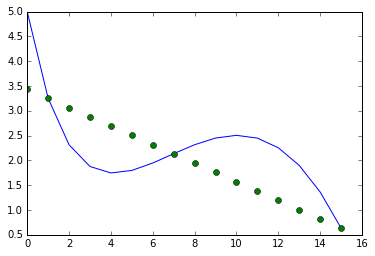

In [129]:
# x = [1,15]
a_linear = numpy.array([[1,1], [15,1]])
b_linear = numpy.array(f([1,15]))
print a_linear
print b_linear
w_linear = linalg.solve(a_linear, b_linear)
print "solved: " + str(w_linear)

def support_func_2(x):
    return w_linear[0] * x + w_linear[1]
f_linear_solved = numpy.vectorize(support_func_2)

y_linear_approx = numpy.array(f_linear_solved(x_axis))


pylab.plot(x_axis, y_axis, '-',
          x_axis, y_linear_approx, 'o')
pylab.show()

[[  1   1   1]
 [ 64   8   1]
 [225  15   1]]
[ 3.25221687  2.31617016  0.63522142]
solved: [-0.00760104 -0.06531159  3.32512949]


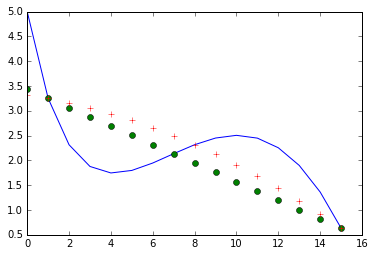

In [130]:
# x = [1,8,15]
a_quadratic = numpy.array([[1,1,1],
                        [8**2,8,1],
                        [15**2,15,1]])
b_quadratic = numpy.array(f([1,8,15]))
print a_quadratic
print b_quadratic
w_quadratic = linalg.solve(a_quadratic, b_quadratic)
print "solved: " + str(w_quadratic)

def support_func_3(x):
    return w_quadratic[0] * (x**2) + w_quadratic[1] * x + w_quadratic[2]
f_quadratic_solved = numpy.vectorize(support_func_3)

y_quadratic_approx = numpy.array(f_quadratic_solved(x_axis))


pylab.plot(x_axis, y_axis, '-',
          x_axis, y_linear_approx, 'o',
          x_axis, y_quadratic_approx, '+')
pylab.show()

[[   1    1    1    1]
 [  64   16    4    1]
 [1000  100   10    1]
 [3375  225   15    1]]
[ 3.25221687  1.74684595  2.50541641  0.63522142]
solved: [-0.00823565  0.19333685 -1.29552587  4.36264154]


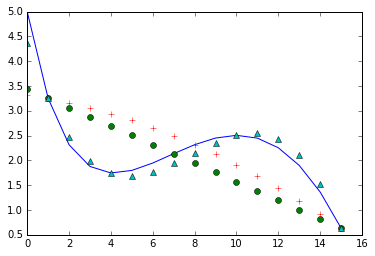

In [131]:
# x = [1,4,10,15]
a_tertiary = numpy.array([[1,1,1,1],
                        [4**3,4**2,4,1],
                        [10**3,10**2,10,1],
                        [15**3,15**2,15,1]])
b_tertiary = numpy.array(f([1,4,10,15]))
print a_tertiary
print b_tertiary
w_tertiary = linalg.solve(a_tertiary, b_tertiary)
print "solved: " + str(w_tertiary)

def support_func_4(x):
    return (w_tertiary[0] * (x**3)) + (w_tertiary[1] * (x**2)) + (w_tertiary[2] * x) + w_tertiary[3]
f_tertiary_solved = numpy.vectorize(support_func_4)
y_tertiary_approx = numpy.array(f_tertiary_solved(x_axis))

pylab.plot(x_axis, y_axis, '-',
          x_axis, y_linear_approx, 'o',
          x_axis, y_quadratic_approx, '+',
          x_axis, y_tertiary_approx, '^')
pylab.show()